In [3]:
from scipy.integrate import odeint

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pycse import nlinfit
import pandas as pd

-EIA Annual Energy Outlook 2020

-Table 45. Transportation Fleet Car and Truck Stock by Type and Technology

-2019 and projections: U.S. Energy Information Administration (EIA), AEO2020 National Energy Modeling System.

In [6]:
#car in stock includes cars that are not in use(i.e sitting in garage)
#car in use includes cars that are used regularly
year = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,
2044,2045,2046,2047,2048,2049,2050])

conventional_cars = np.array([123.672562,123.441124,122.987709,122.459618,
121.999062,121.570724,121.231659,120.903519,120.602974,120.252853,
119.861824,119.45887,119.011002,118.55275,118.126495,117.7565,117.470573,
117.296814,117.21965,117.271103,117.434135,117.676071,117.995857,118.394112,
118.824203,119.287155,119.786743,120.29351,120.810143,121.331642,121.834694,
122.323364])# million

ev_cars = np.array([0.804601,1.107904,1.514288,1.922637,2.345654,2.806079,
3.311775,3.826321,4.350964,4.891109,5.452297,6.044231,6.674578,7.338997,
8.0362,8.766011,9.525219,10.308653,11.110107,11.925632,12.755437,13.591568,
14.422963,15.25312,16.085264,16.91797,17.754712,18.589699,19.423309,20.262503,
21.09875,21.930136])#million

total_cars = conventional_cars + ev_cars
zero_cars = np.zeros(total_cars.shape)



In [4]:
pd.option_context('display.max_rows', 100, 'display.max_columns', 100)

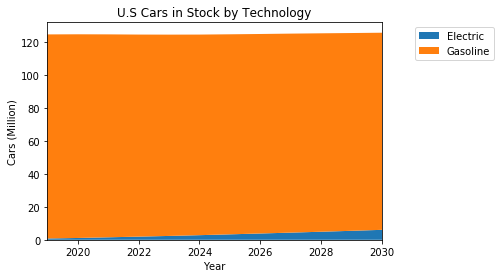

In [9]:
%matplotlib inline
labels = ["Electric","Gasoline"]
plt.stackplot(year[:12],ev_cars[:12],conventional_cars[:12])
plt.xlabel("Year")
plt.ylabel("Cars (Million)")
plt.xlim(2019,2030)
plt.title("U.S Cars in Stock by Technology" )
plt.legend(labels = labels,bbox_to_anchor = [1.35,1])

In [10]:
print("total cars @ 2030",total_cars[11],"millions")
print("EV @ 2030",ev_cars[11],"millions")
print("Conventional @ 2030",conventional_cars[11],"millions")
print((ev_cars[11]/total_cars[11])*100)

total cars @ 2030 125.503101 millions
EV @ 2030 6.044231 millions
Conventional @ 2030 119.45887 millions
4.816001319361822


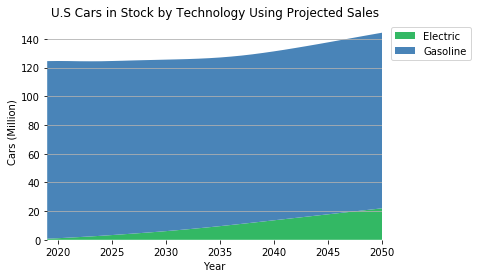

In [11]:
plt.stackplot(year,ev_cars,conventional_cars, colors = ['#33b864','#4984b8'])
plt.xlabel("Year")
plt.ylabel("Cars (Million)")
plt.xlim(2019,2050)
plt.title("U.S Cars in Stock by Technology Using Projected Sales" )
plt.legend(labels = labels,bbox_to_anchor = [1.28,1])
plt.grid(axis = "y")
plt.box()
plt.show()

In [12]:
print("total cars @ 2050",total_cars[-1],"millions")
print("EV @ 2050",ev_cars[-1],"millions")
print("Conventional @ 2050",conventional_cars[-1],"millions")
print((ev_cars[-1]/total_cars[-1])*100)

total cars @ 2050 144.2535 millions
EV @ 2050 21.930136 millions
Conventional @ 2050 122.323364 millions
15.202498379588711


Proposed plan to reach 50 @ 30

In [13]:
#assume all car sales are electric from 2019
#upper bounds on cars that can be retired are 10+ years or older

#from 2020 - 2029
car_sales = np.array([7338.012695,7227.481445,7068.838867,6962.69043,7002.719238,
7029.242188,7117.472168,7151.890625,7277.216797,7391.891113,7514.611328,])/1000 # millions
car_sales = car_sales *0.825 #retirement
n = len(ev_cars[0:12])
m = len(car_sales)
ev_cars2 = np.zeros(n)
ev_cars2[0] = ev_cars[0]

year2 = year[:12]
for i in range(m):
    ev_cars2[i+1] = ev_cars2[i] + car_sales[i]



In [14]:
t = np.array([2019,2030])
y = np.array([conventional_cars[0],ev_cars2[-1]])

def retire_car(t,a,b):
    return a*np.exp(-b*(t-2019))

pars, ci ,se = nlinfit(retire_car,t,y,[conventional_cars[0],0.05])

C:\Users\jangs\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


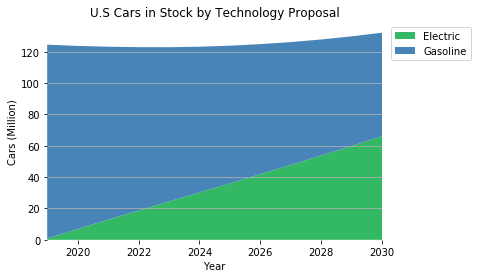

In [15]:
conventional_cars2 = retire_car(year2,*pars)
%matplotlib inline
plt.stackplot(year2,ev_cars2,conventional_cars2,colors = ['#33b864','#4984b8'])
plt.xlabel("Year")
plt.ylabel("Cars (Million)")
plt.xlim(2019,2030)
plt.title("U.S Cars in Stock by Technology Proposal" )
plt.legend(labels = labels,bbox_to_anchor = [1.28,1])
plt.grid(axis = "y")
plt.box()
plt.show()

In [16]:
n = len(conventional_cars2)
cars_retired = np.zeros(n)

for i in range(n):
    cars_retired[0] = 0
    cars_retired[i] = conventional_cars2[i-1] - conventional_cars2[i]
    
cars_retired = cars_retired[1:]
cars_retired

array([6.85502039, 6.47505491, 6.11615046, 5.77713964, 5.45691978,
       5.15444933, 4.86874444, 4.59887583, 4.34396571, 4.10318495,
       3.87575038])

In [17]:
total_cars[:12]

array([124.477163, 124.549028, 124.501997, 124.382255, 124.344716,
       124.376803, 124.543434, 124.72984 , 124.953938, 125.143962,
       125.314121, 125.503101])

In [18]:
total_cars2 = ev_cars2 + conventional_cars2
total_cars2

array([124.477163  , 123.67600308, 123.16362036, 122.87926197,
       122.84634194, 123.16666553, 123.811341  , 124.8145111 ,
       126.11594504, 127.77568319, 129.7708084 , 132.09461238])

In [19]:
sum_cars_retired = sum(cars_retired)
ans = sum_cars_retired * 4500 #million$
ans/1000

259.31365115602506

In [18]:
sum_cars_retired

57.62525581245001

In [19]:
car_sales

array([6.05386047, 5.96267219, 5.83179207, 5.7442196 , 5.77724337,
       5.79912481, 5.87191454, 5.90030977, 6.00370386, 6.09831017,
       6.19955435])

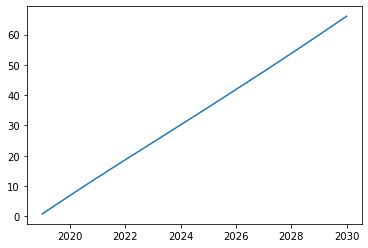

In [20]:
plt.plot(year2,ev_cars2)

In [21]:
np.vander?

In [22]:
len(year2)

12

<ErrorbarContainer object of 3 artists>

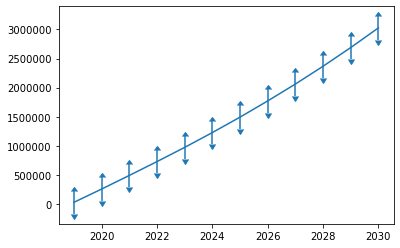

In [23]:

production_cost = np.zeros(12)

for i in range(11):
    production_cost[0] =12750+24100
    production_cost[i+1] = production_cost[i]*1.02
production_cost
annual_production_cost = production_cost *ev_cars2
# plt.plot(year2,annual_production_cost)
plt.errorbar(year2,annual_production_cost,yerr = 200000,uplims=True, lolims=True,
             label='uplims=True, lolims=True')

In [4]:
57.6*1e6 * 4500/1000000000



259.2

In [1]:
1e6

1000000.0